# transformers - hugging face

所有的finetuning 和 pretraining 的一些参考脚本，参考https://huggingface.co/transformers/notebooks.html

Getting Started Tokenizers	Tokenizer 使用	https://colab.research.google.com/github/huggingface/transformers/blob/master/notebooks/01-training-tokenizers.ipynb

Getting Started Transformers	快速上手transformers API	https://colab.research.google.com/github/huggingface/transformers/blob/master/notebooks/02-transformers.ipynb

How to use Pipelines	快速使用SOTA 模型进行NLP任务使用	https://colab.research.google.com/github/huggingface/transformers/blob/master/notebooks/03-pipelines.ipynb

How to fine-tune a model on text classification	文本分类任务	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/text_classification.ipynb

How to fine-tune a model on language modeling	进行预训练	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/language_modeling.ipynb

How to fine-tune a model on token classification	进行NER/POS等任务	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/token_classification.ipynb

How to fine-tune a model on question answering	进行机器阅读理解MRC任务	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/question_answering.ipynb

How to fine-tune a model on multiple choice	进行多选题任务（SWAG）	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/multiple_choice.ipynb

How to fine-tune a model on translation	机器翻译任务（WMT）	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/translation.ipynb

How to fine-tune a model on summarization	文本摘要任务（XSUM）	https://colab.research.google.com/github/huggingface/notebooks/blob/master/examples/summarization.ipynb

How to train a language model from scratch	从头训练一个预训练模型语言模型	https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/01_how_to_train.ipynb

How to generate text	使用多种decoidng方法进行文本生成	https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb

How to use Benchmarks	用transformers 进行基线模型计算	https://colab.research.google.com/github/huggingface/transformers/blob/master/notebooks/05-benchmark.ipynb

Reformer	reformer 模型使用	https://colab.research.google.com/github/patrickvonplaten/blog/blob/master/notebooks/03_reformer.ipynb

## pipepline function

### examples

task (:obj:`str`):
            The task defining which pipeline will be returned. Currently accepted tasks are:
    
    - :obj:`"feature-extraction"`:  (get the vector representation of a text) 特征抽取
    - :obj:`"text-classification"`: will return a :class:`~transformers.TextClassificationPipeline`.
    - :obj:`"sentiment-analysis"`: (alias of :obj:`"text-classification") 情感分析
    - :obj:`"token-classification"`: 每个token的分类
    - :obj:`"ner"` (alias of :obj:`"token-classification"): 命名实体识别
    - :obj:`"question-answering"`: 阅读理解
    - :obj:`"fill-mask"`: 预测mask的词
    - :obj:`"summarization"`: 摘要
    - :obj:`"translation_xx_to_yy"`:  翻译
    - :obj:`"text2text-generation"`: will return a :class:`~transformers.Text2TextGenerationPipeline`.
    - :obj:`"text-generation"`: 文本生成
    - :obj:`"zero-shot-classification:`: 零样本分类
    - :obj:`"conversational"`: will return a :class:`~transformers.ConversationalPipeline

In [1]:
from transformers import pipeline

In [2]:
# sentiment-analysis-情感分析
classifier = pipeline("sentiment-analysis")
classifier(["I am so happy today","fuck u bitch"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998794794082642},
 {'label': 'NEGATIVE', 'score': 0.9951935410499573}]

In [6]:
classifier(["My daddy fucked my ass today"])

[{'label': 'NEGATIVE', 'score': 0.9921762347221375}]

In [9]:
classifier(["我今天很伤心"]) # 英文的pipeline干不了中文

[{'label': 'POSITIVE', 'score': 0.8508496284484863}]

In [ ]:
results = classifier(["We are very happy to show you the 🤗 Transformers library.",
           "We hope you don't hate it."])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

In [ ]:
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

In [14]:
# zero-shot-classification
from transformers import pipeline
classifier = pipeline("zero-shot-classification")
classifier("This is a company of finance and investingt",
           candidate_labels=["finance","education","business","porn"],)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


{'sequence': 'This is a company of finance and investingt',
 'labels': ['finance', 'business', 'education', 'porn'],
 'scores': [0.5131638646125793,
  0.4853340983390808,
  0.0008461604011245072,
  0.0006558363093063235]}

In [15]:
# text-gneration
from transformers import pipeline

generator = pipeline("text-generation")
generator("My wife and five huge dick black guys in a room")

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Using pad_token, but it is not set yet.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "My wife and five huge dick black guys in a room were sitting on the sofa playing at a friend's house in the back of their small studio. It's only in the morning and we are out on the beach or going for good old days."}]

In [16]:
# use another model with pipeline
# text-gneration
from transformers import pipeline

generator = pipeline("text-generation",model="distilgpt2")
generator("My wife and five huge dick black guys in a room",
         max_length=50,
         num_return_sequences=2,)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Using pad_token, but it is not set yet.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'My wife and five huge dick black guys in a room at an exotic restaurant, one of whom reportedly had a number of genitals.\n\n\n\n\nThe first victim, who declined to identify her as Mr. Gump, said that while the'},
 {'generated_text': 'My wife and five huge dick black guys in a room at night in the woods.” That was what made her an easy target; she had to use a lot of my friends and to go into a place to be a part of the community'}]

In [17]:
# fill-mask
# text-gneration
from transformers import pipeline

generator = pipeline("fill-mask")
generator("My wife and five huge dick black guys <mask> in a room",top_k=5)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'sequence': 'My wife and five huge dick black guys sitting in a room',
  'score': 0.19055452942848206,
  'token': 2828,
  'token_str': ' sitting'},
 {'sequence': 'My wife and five huge dick black guys sleeping in a room',
  'score': 0.18846315145492554,
  'token': 8416,
  'token_str': ' sleeping'},
 {'sequence': 'My wife and five huge dick black guys living in a room',
  'score': 0.08302614092826843,
  'token': 1207,
  'token_str': ' living'},
 {'sequence': 'My wife and five huge dick black guys together in a room',
  'score': 0.051471929997205734,
  'token': 561,
  'token_str': ' together'},
 {'sequence': 'My wife and five huge dick black guys hiding in a room',
  'score': 0.04045278951525688,
  'token': 9646,
  'token_str': ' hiding'}]

In [21]:
# text-gneration
from transformers import pipeline

generator = pipeline("ner",grouped_entities=True) # 让被分开的词合在一起如Yao+Ming
generator("My name is Yao Ming and i work in apple company in new york")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


[{'entity_group': 'PER',
  'score': 0.9958803,
  'word': 'Yao Ming',
  'start': 11,
  'end': 19}]

In [22]:
# QA - extractive QA
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn"
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6949771046638489, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [23]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer("""Today, he admits, it didn’t have to end like that.
“There’s a moment when [former CBS CEO] Les Moonves and his top lawyer, Bruce, were at my house and they said, ‘OK, the Warner jet is fueled up on the runway. Wheels up in an hour and going to rehab, right?’ My first thought was sort of like really … there’s some comedy value to what my first thought was,” Sheen says. “In that moment, when I said, ‘Oh, damn, I finally get the Warner jet.’ That’s all I heard. But if I could go back in time to that moment, I would’ve gotten on the jet. And it was that giant left turn in that moment that led to, you know, a very unfortunate sequence of public and insane events.”
Sheen now admits he was not a team player.
“There was 55 different ways for me to handle that situation, and I chose number 56. And so, you know, I think the growth for me post-meltdown or melt forward or melt somewhere — however you want to label it — it has to start with absolute ownership of my role in all of it,” Sheen explains. “And it was desperately juvenile.”
He added, “I think it was drugs or the residual effects of drugs … and it was also an ocean of stress and a volcano of disdain. It was all self-generated, you know,” Sheen says of what prompted the incident. “All I had to do was take a step back and say, ‘OK, let’s make a list. Let’s list, like, everything that’s cool in my life that’s going on right now. Let’s make a list of what’s not cool.’ You know what I’m saying? And the cool list was really full. The not cool list was, like, two things that could’ve been easily dismissed.
“I was getting loaded and my brain wasn’t working right.”
 Today, the novelty of public celebrity meltdowns is looked at differently. No longer is it cool to sit back and watch someone set their life on fire.
“I was really a guy that needed someone to reach out to and say, ‘Hey, man, obviously there’s a ton of other s*** going on. How can we help?'” Sheen says. “And instead they showed up in droves with banners and songs, all types of fanfare and celebration of, you know, what I think was a very public display of a mental health moment.”
""",max_length=30)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' Sheen: "There was 55 different ways for me to handle that situation, and I chose number 56" Sheen admits he was not a'}]

In [ ]:
# translation
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")
[{'translation_text': 'This course is produced by Hugging Face.'}]

### using pipeline's details

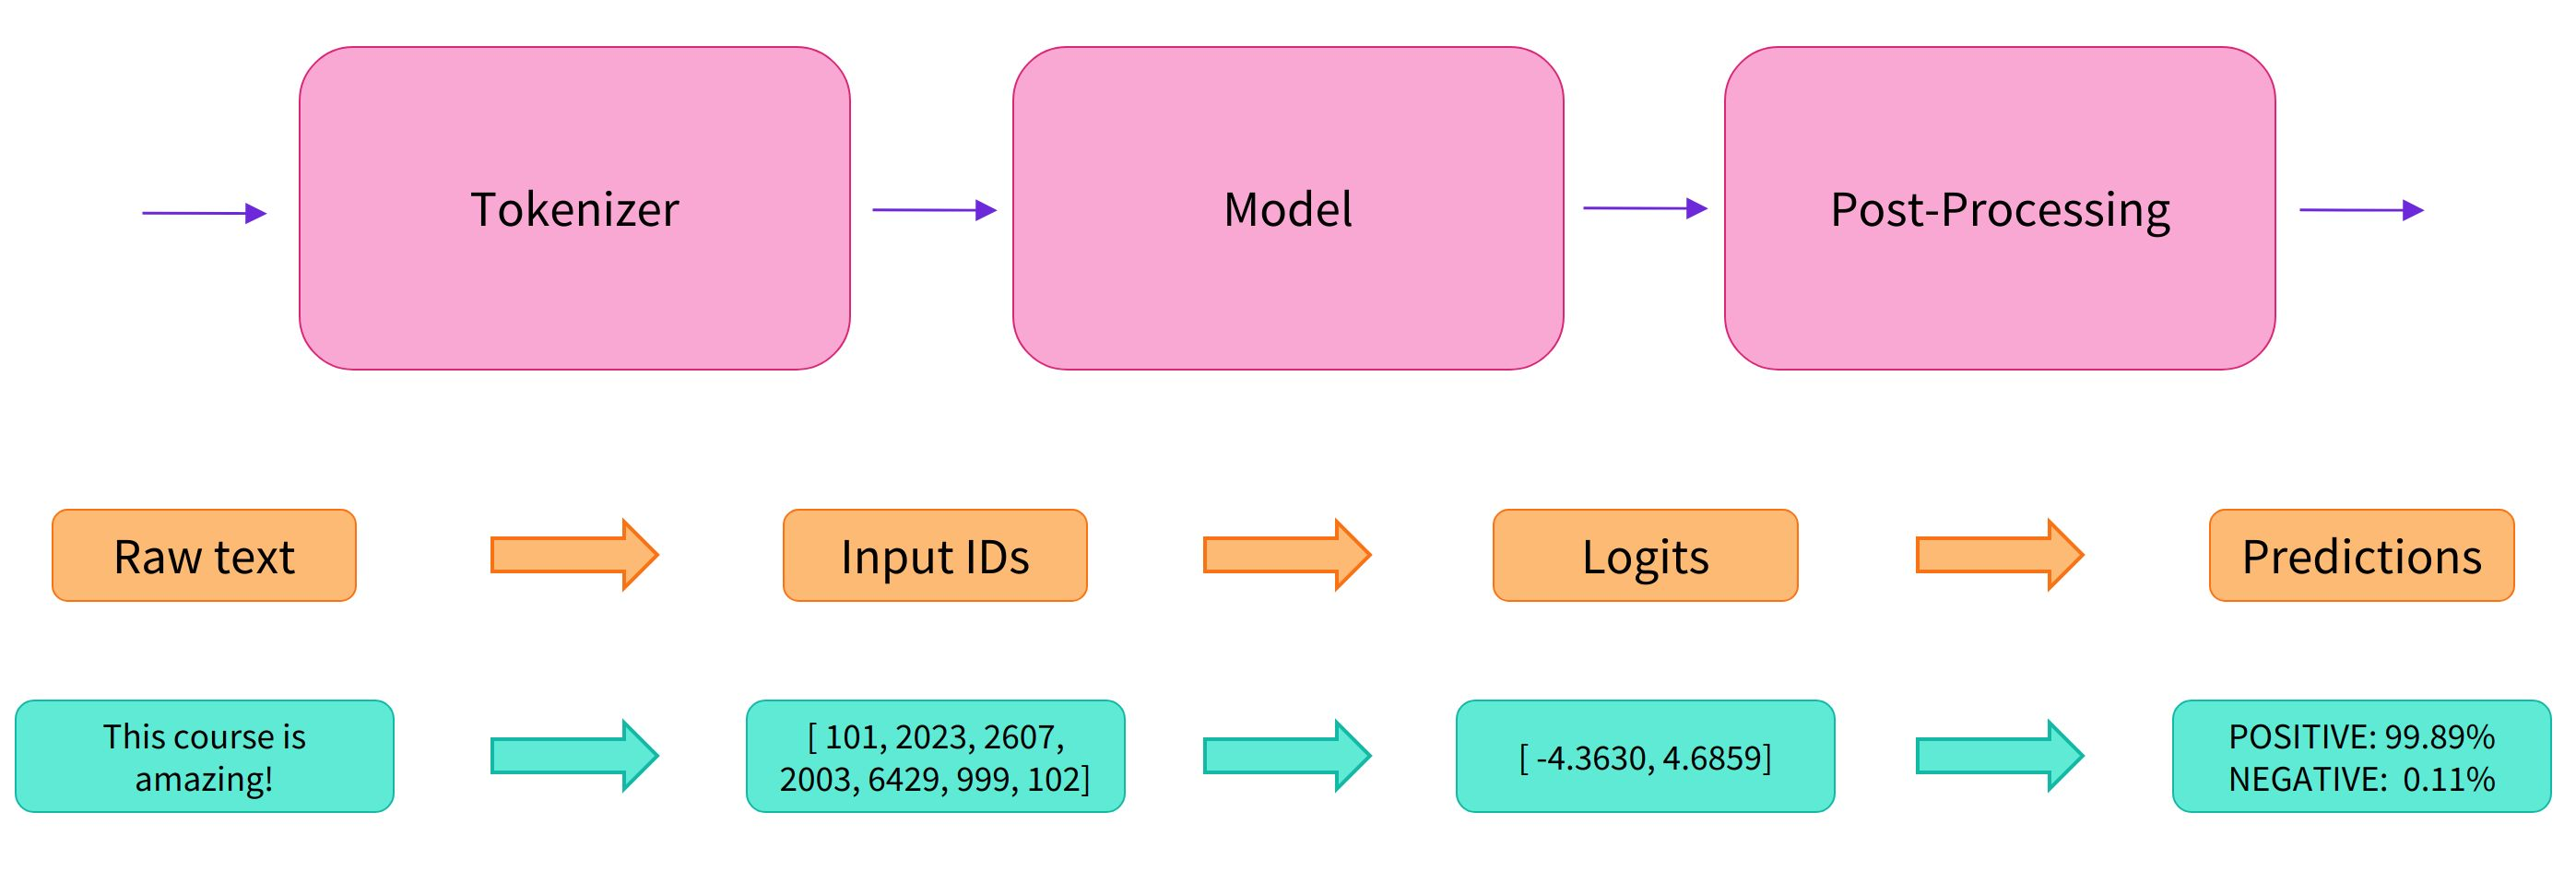

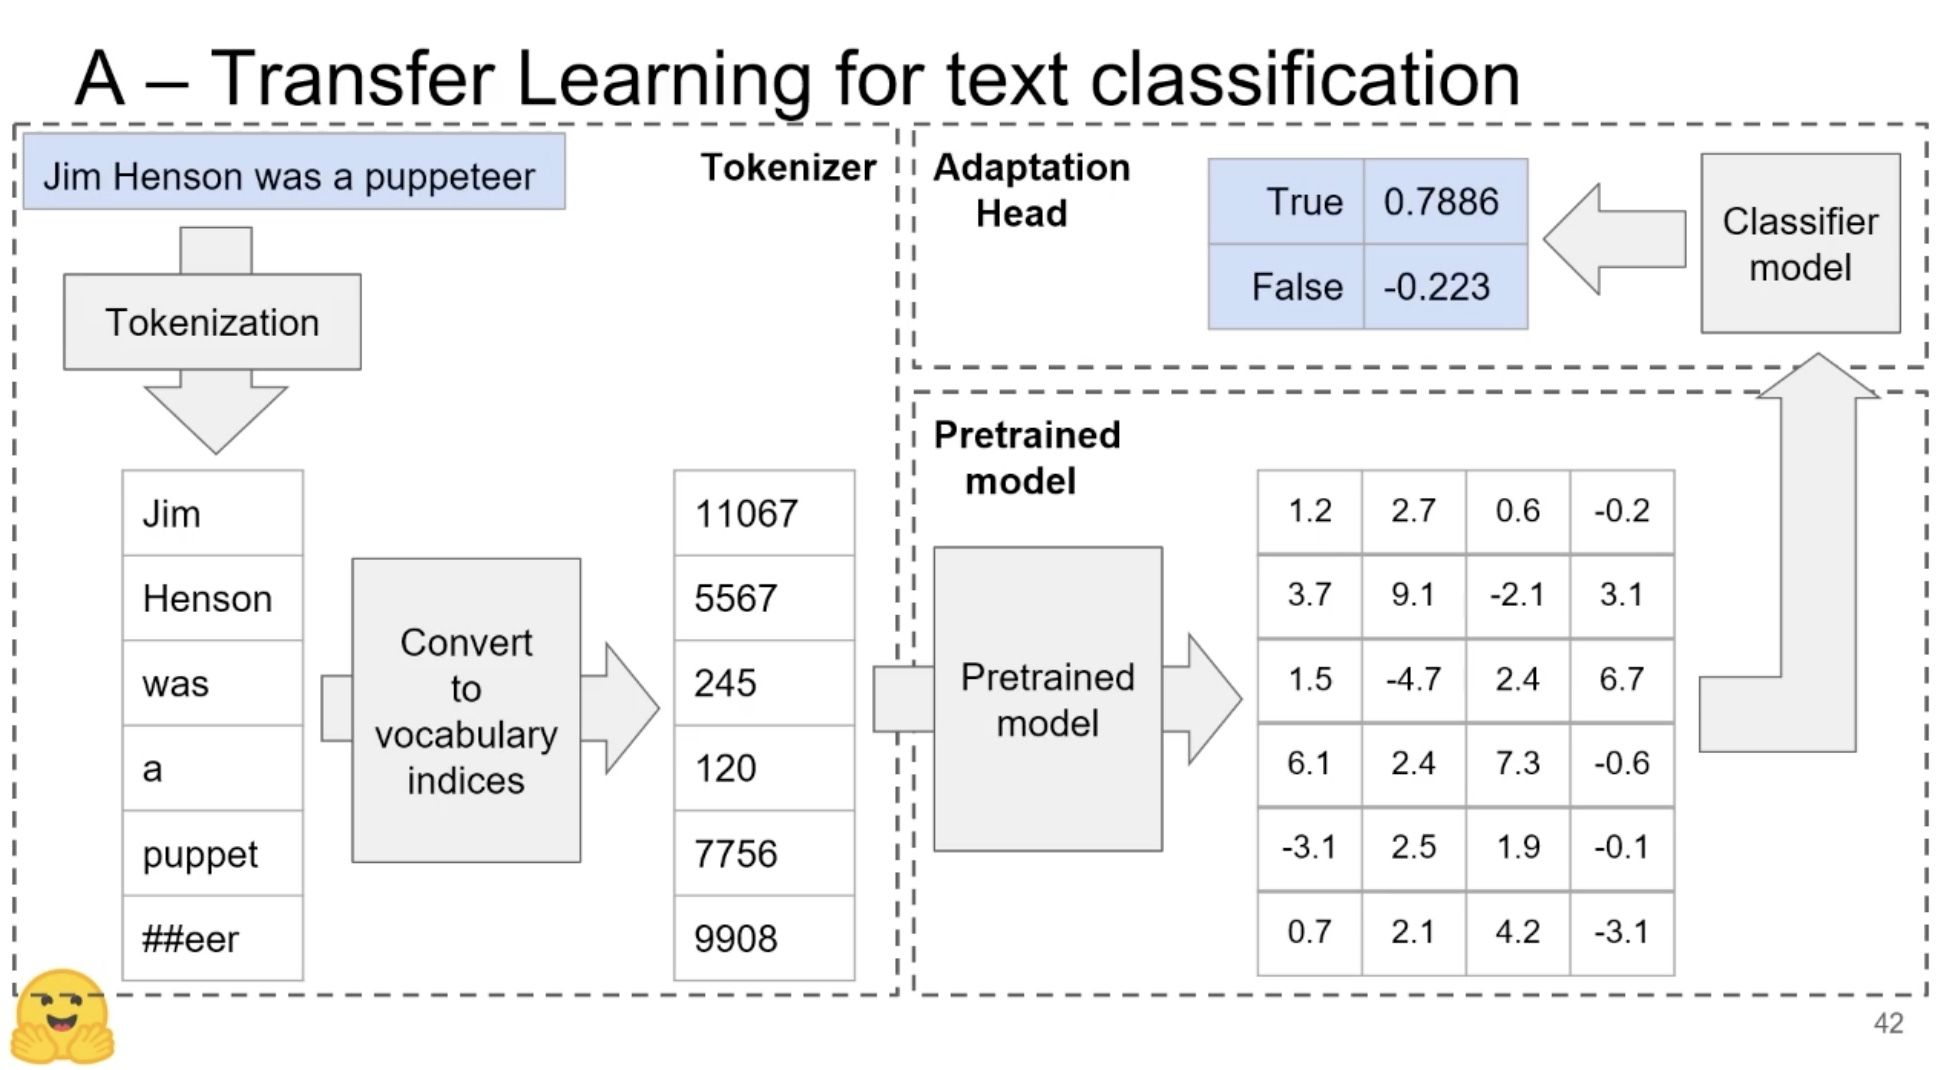

In [ ]:
# API
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier([
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",
])
'''这背后其实包含了三个步骤： - preprocess - fit model - postprocessing'''

#### Preprocessing with a tokenizer

In [ ]:
from transformers import AutoTokenizer

'''使用 AutoTokenizer 的 from_pretrained 方法进行tokenizer 的加载，
通过把tokenizer 的checkpoint 导入它可以自动获取tokenizer需要的数据并进行缓存（下次无需下载）'''

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",
]

'''通过 return_tensors 指定输出的格式默认是numpy（np），可以指定为：tensorflow（tf），或者pytorch（pt）'''
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

'''
{
    'input_ids': tensor([
        [  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172, 2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,     0,     0,     0,     0,     0,     0]
    ]), 
    'attention_mask': tensor([
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ])
}
'''

'''tokenizer 的保存和 model 的保存是一致的'''
tokenizer.save_pretrained("directory_on_my_computer")

tokenizer 的输出为是一个字典，包含了两个keys, (输出的结果键值对和预训练有关)
    
    - input_ids: 每个token 对应的id，必有 
    - attention_mask: token 是否需要被attend 到，1 代表需要，0 代表不需要，一般0指的是padding 的部分，具体也是无意义的词（一般都有）
每个tokenizer都会输出不同的key value，这个和其预训练任务有关。因为distilbert 采用的训练方式是MLM（mask language model），
没有使用NSP（next sentence predition），所以没有像bert一样的key: token_type_ids

tokenizer 的输出的每个向量都是包含了2个维度， [batch_size, sequence_len]： - batch_size: 每次传入的文本序列的个数，上面的例子为2句话 - sequence_len：序列的长度，输出的每个文本的长度，这边必须保证每个batch 的长度为一致，可以有多个策略，例如padding，truncated等，这边例子为16

#### Going through the transformer model

我们可以像tokenizer下载对应的模型，例如使用 AutoModel class 的 from_pretrained 方法, 可以指定model name 或者指定本地的文件地址

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

模型的把tokenizer之后的输出作为输入，然后会得到 hidden states， 也可以称为features。对于每个模型的输入，都会得到一个高纬度的，带有上下文理解的向量表示。这些向量表示具有三个维度，[batch_size, sequence_len, hidden_size]： 

    - batch_size: 每次传入的文本序列的个数，上面的例子为2句话 
    - sequence_len：序列的长度，输出的每个文本的长度，这边必须保证每个batch 的长度为一致，可以有多个策略，例如padding，truncated等，这边例子为16 
    - hidden size：每个token 对应的向量表达，一般为768，具体是在config中配置的。
这边称高维度 “high dimensional” 是因为最后一维，hidden size 可以非常的大，例如base模型通常是768，large 模型是 3072 或者更高

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

'''torch.Size([2, 16, 768])'''

模型的输出和 namedtuple 很像，你可以通过attribute 或者key 进行访问，

例如 outputs["last_hidden_state"] 或者 outputs.last_hidden_state 或者通过index 访问： outputs[0]

#### Model heads: Making sense out of numbers

模型的 head 是具体任务的layer，它通常是将transformer 的模型的hidden outputs（or features）作为输入，然后将他们映射到不同的维度，通常它包含了单个或者多个layers,transformer 的模型输出是直接喂给head的

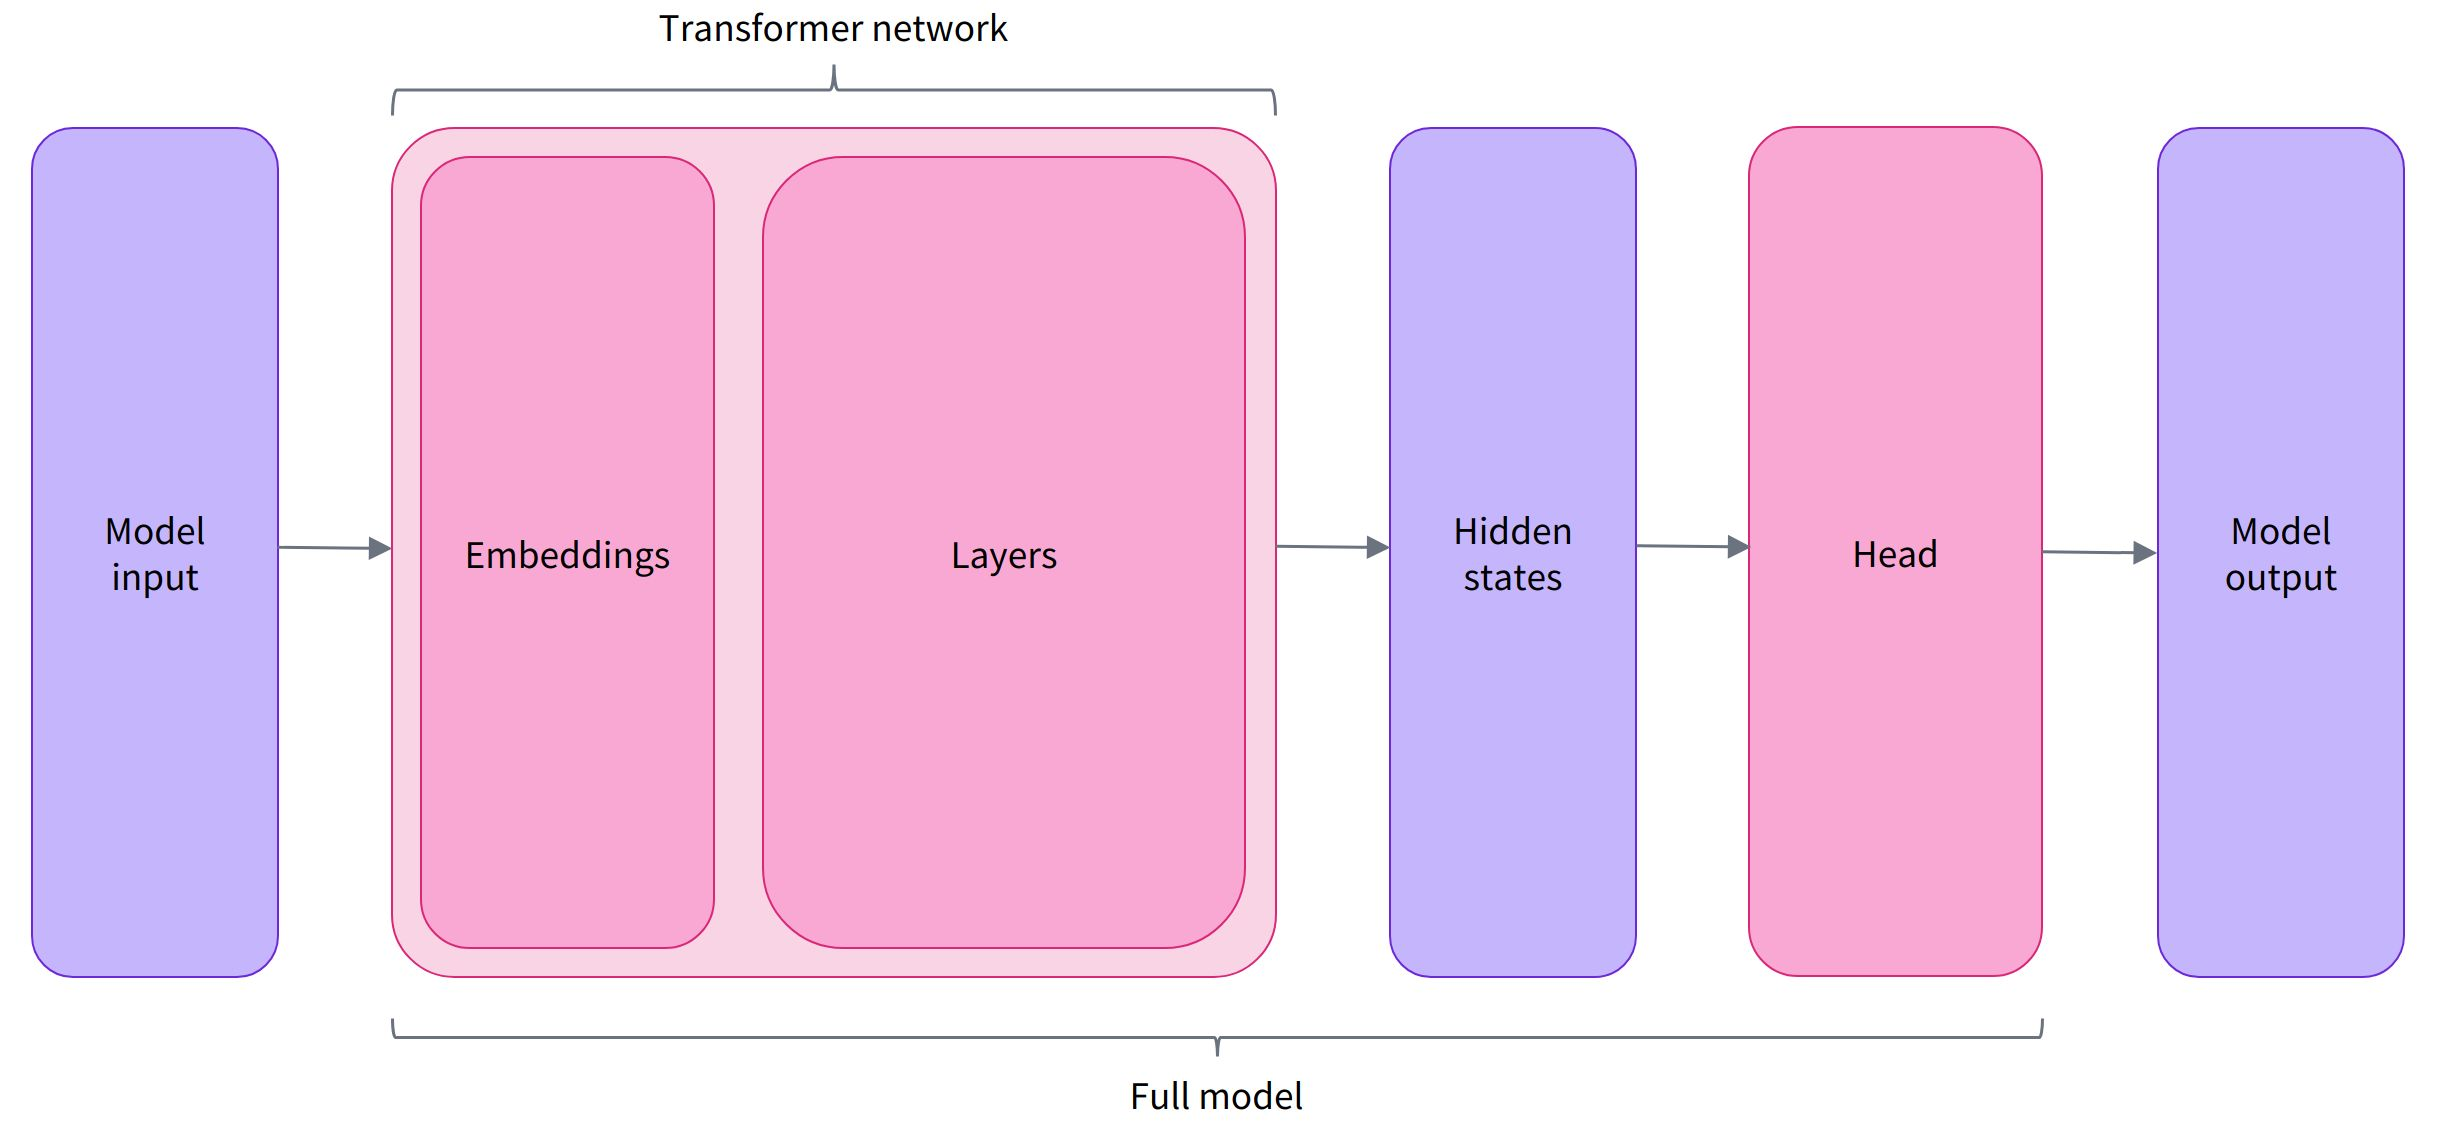

在上图中，文本输入被tokenizer 进行 embedding 之后，得到 input ids，为了满足transformer 模型的attention 机制，还会输入 mask attention，此外，有些模型例如bert，还需要 input type ids，这些输入都传给transformer 后，得到每个token的语义embedding，之后在连接不同的head，进行不同的NLP 任务

具体有非常多的特定任务的head可以选择：

    *Model (retrieve the hidden states)
        例如：AutoModel, XLMModel, BertModel 等，直接使用都可以用于获取句子的表征
    *ForCausalLM
        例如：AutoModelForCausalLM, XLMModelForCausalLM， BertModelForCausalLM
    *ForMaskedLM
        例如：AutoModelForMaskedLM, XLMModel, BertModel 等
    *ForMultipleChoice
        例如：AutoModelForMultipleChoice, XLMModelForMultipleChoice, BertModelForMultipleChoice 等
    *ForQuestionAnswering
        例如：AutoModelForQuestionAnswering, XLMModelForQuestionAnswering, BertModelForQuestionAnswering 等
    *ForSequenceClassification
        例如：AutoModelForSequenceClassification, XLMModelForSequenceClassification, BertModelForSequenceClassification 等
    *ForTokenClassification
        例如：AutoModelForTokenClassification, XLMModelForTokenClassification,BertModelForTokenClassification 等 and others

In [ ]:
'''注意这边我们可以通过指定 num_labels=2 去指定最后输出的 head 的label 个数, 并且 指定id2label 这个字典。'''
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2) # 
# or
# model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

outputs = model(**inputs)

#### Postprocessing the output

In [ ]:
'''模型最后的输出如下'''
print(outputs.logits)

'''tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward>)'''

我们可以看到最后的输出是一串数据，第一个句子的结果是：[-1.5607, 1.6123] 第二个句子的结果是：[ 4.1692, -3.3464], 其和并不为1，这是因为transformer 的输出都是logits 是softmax之前的结果。

如果需要进行归一化，则需要进行 torch.nn.functional.softmax(outputs.logits, dim=-1)

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(preditcions)

'''tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward>)'''

如果需要获取每个位置对应的label，则需要使用模型 config 的 id2label 属性

In [ ]:
model.config.id2label
{0: 'NEGATIVE', 1: 'POSITIVE'}

## using huggingface transformers

### load model

In [ ]:
# A example of using Auto Stuff
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [ ]:
from transformers import AutoModel

bert_model = AutoModel.from_pretrained("bert-base-cased")
print(type(bert_model))

gpt_model = AutoModel.from_pretrained("gpt2")
print(type(gpt_model))

bart_model = AutoModel.from_pretrained("facebook/bart-base")
print(type(bart_model))

In [ ]:
from transformers import AutoConfig

bert_config = AutoConfig.from_pretrained("bert-base-cased")
print(type(bert_config))

gpt_config = AutoConfig.from_pretrained("gpt2")
print(type(gpt_config))

bart_config = AutoConfig.from_pretrained("facebook/bart-base")
print(type(bart_config))

In [ ]:
# using only 10 layers instead of 12
from transformers import BertConfig,BertModel

bert_config = BertConfig.from_pretrained("bert-base-cased",num_hidden_layers = 10)
bert_model = BertModel(bert_config)

# training code

# saving model
bert_model.save_pretrained("my-bert-model")

# reloading a saved model
bert_model = BertModel.from_pretrained("my-bert-model")

### tokenize

#### tokenize in pipeline example

In [ ]:
inputs = tokenizer("We are very happy to show you the 🤗 Transformers library.")
print(inputs)
'''
{'input_ids': [101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
'''

In [42]:
pt_batch = tokenizer(
    ["好开心，今天是我有生以来最快乐的一天了，感激", "悲伤笼罩了我，我非常的痛恨和害怕这个地方"],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)

In [43]:
for key, value in pt_batch.items():
    print(f"{key}: {value.numpy().tolist()}")
'''
input_ids: [[101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], [101, 2057, 3246, 2017, 2123, 1005, 1056, 5223, 2009, 1012, 102, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]
'''

input_ids: [[101, 1962, 2458, 2552, 8024, 791, 1921, 3221, 2769, 3300, 4495, 809, 3341, 3297, 2571, 727, 4638, 671, 1921, 749, 8024, 2697, 4080, 102], [101, 2650, 839, 5021, 5388, 749, 2769, 8024, 2769, 7478, 2382, 4638, 4578, 2616, 1469, 2154, 2586, 6821, 702, 1765, 3175, 102, 0, 0]]
token_type_ids: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]


'\ninput_ids: [[101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], [101, 2057, 3246, 2017, 2123, 1005, 1056, 5223, 2009, 1012, 102, 0, 0, 0]]\nattention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]\n'

#### tokenizer details

In [ ]:
# 尝试使用AutoTokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
inputs = tokenizer("Let's go get that bitch")
inputs["input_ids"]

In [ ]:
# tokenize内部三部曲：先分词，再加特殊标记符，再转换成ids，下面三步效果等同于上面
text = "Let's go get that bitch"
tokens = tokenizer.tokenize(text) # 分词
input_ids = tokenizer.convert_tokens_to_ids(tokens) # 变成ids
final_inputs = tokenizer.prepare_for_model(input_ids) # 加上标记符如[CLS][SEP]

bert用[CLS][SEP]，roberta用<s></s>，不同model的tokenizer都不太一样

In [ ]:
# decode into sentence
tokenizer.decode(encoded_input["input_ids"])

In [ ]:
# 如果要做成batch，那么把text做成一个list送进tokenizer就好了，出来的也是batch
batch_sentences = ["Hello I'm a single sentence",
                   "And another sentence",
                   "And the very very last one"]
encoded_inputs = tokenizer(batch_sentences)
print(encoded_inputs)
      
# batch处理的话还可以使用自带的预处理 功能
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(batch)

处理句子pair的时候，比如两个句子相似匹配，或者上下文的QA抽取，对于 BERT 模型，输入的表示如下：[CLS] Sequence A [SEP] Sequence B [SEP]

In [ ]:
encoded_input = tokenizer("How old are you?", "I'm 6 years old")
print(encoded_input)
'''
{'input_ids': [101, 1731, 1385, 1132, 1128, 136, 102, 146, 112, 182, 127, 1201, 1385, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
'''
tokenizer.decode(encoded_input["input_ids"])

You can force the return (or the non-return) of any of those special arguments by using return_input_ids=True or return_token_type_ids=True

In [ ]:
# 句子对的batch制作
batch_sentences = ["Hello I'm a single sentence",
                   "And another sentence",
                   "And the very very last one"]
batch_of_second_sentences = ["I'm a sentence that goes with the first sentence",
                             "And I should be encoded with the second sentence",
                             "And I go with the very last one"]
encoded_inputs = tokenizer(batch_sentences, batch_of_second_sentences)
print(encoded_inputs)

# 加入预处理功能
batch = tokenizer(batch_sentences, batch_of_second_sentences, padding=True, truncation=True, return_tensors="pt")

### ⭐using model

In [12]:
# using from local files
from transformers import BertTokenizer, BertModel,BertConfig
bert_path = "D:/kwCodes/pretrained_model/chinese_roberta_wwm_ext_pytorch/"  # 该文件夹下存放三个文件（'vocab.txt', 'pytorch_model.bin', 'config.json'）
tokenizer = BertTokenizer.from_pretrained(bert_path,local_files_only=True)  # 初始化分词器
model = BertModel.from_pretrained(bert_path,local_files_only=True)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some weights of the model checkpoint at D:/kwCodes/pretrained_model/chinese_roberta_wwm_ext_pytorch/ were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing 

In [38]:
# download from internet
from transformers import BertTokenizer, BertModel, BertConfig
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")
config = BertConfig.from_pretrained("bert-base-chinese")
model = BertModel.from_pretrained("bert-base-chinese")

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [44]:
pt_batch

{'input_ids': tensor([[ 101, 1962, 2458, 2552, 8024,  791, 1921, 3221, 2769, 3300, 4495,  809,
         3341, 3297, 2571,  727, 4638,  671, 1921,  749, 8024, 2697, 4080,  102],
        [ 101, 2650,  839, 5021, 5388,  749, 2769, 8024, 2769, 7478, 2382, 4638,
         4578, 2616, 1469, 2154, 2586, 6821,  702, 1765, 3175,  102,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

In [45]:
pt_outputs = model(**pt_batch) # 得到input直接塞进model就可以得到output,unpack就好

In [46]:
print(pt_outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 8.9804e-01, -1.7052e-01,  1.0220e+00,  ..., -1.7976e-01,
           7.3666e-01, -2.6386e-01],
         [ 6.2743e-02,  5.3170e-01,  4.0471e-01,  ..., -8.0661e-01,
           1.7742e-01, -2.4052e-01],
         [ 1.6949e+00,  1.1042e-01,  6.0250e-01,  ..., -2.4969e-01,
           2.2087e-01,  6.4133e-02],
         ...,
         [ 1.1895e+00, -5.5425e-01,  8.9116e-01,  ..., -2.4761e-01,
           8.8119e-01, -3.7148e-01],
         [ 1.0076e+00,  2.2632e-03,  3.2848e-01,  ..., -2.3269e-01,
           2.4698e-02, -2.9411e-02],
         [ 8.4471e-01, -4.8651e-01,  1.2655e+00,  ..., -2.4724e-01,
           5.3274e-01, -6.3498e-01]],

        [[ 4.9770e-01,  2.3199e-01, -1.1954e-03,  ..., -6.3562e-01,
           5.6886e-01, -2.5892e-01],
         [ 7.1518e-01,  6.3623e-01, -1.1425e-01,  ..., -6.4897e-01,
           1.8496e-01, -5.9301e-02],
         [ 1.3535e+00, -1.7856e-01, -7.8862e-01,  ...,  6.5178e-01,
           8.

In [47]:
from torch import nn
pt_predictions = nn.functional.softmax(pt_outputs.pooler_output, dim=-1)
pt_predictions

tensor([[0.0024, 0.0024, 0.0024,  ..., 0.0003, 0.0003, 0.0023],
        [0.0024, 0.0024, 0.0024,  ..., 0.0003, 0.0003, 0.0010]],
       grad_fn=<SoftmaxBackward>)

In [ ]:
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

In [ ]:
# 如果需要，您还可以要求模型返回所有隐藏状态和所有注意力权重
pt_outputs = model(**pt_batch, output_hidden_states=True, output_attentions=True)
all_hidden_states  = pt_outputs.hidden_states
all_attentions = pt_outputs.attentions
all_hidden_states, all_attentions

### 自定义model

如果要更改模型本身的构建方式，可以定义自定义configuration class。每个架构都有自己的相关configuration。例如，DistilBertConfig允许您指定 DistilBERT 的hidden dimension, dropout rate等参数。如果您进行核心修改，例如更改hidden size，您将无法再使用预训练模型，而需要从头开始训练。然后，您将直接从此configuration实例化(instantiate)模型。

下面，我们使用该from_pretrained()方法为分词器加载预定义的词汇表 。然而，与分词器不同的是，我们希望从头开始初始化模型。因此，我们从configuration而不是使用from_pretrained()方法实例化模型 。

In [ ]:
from transformers import DistilBertConfig, DistilBertTokenizer, DistilBertForSequenceClassification
config = DistilBertConfig(n_heads=8, dim=512, hidden_dim=4*512)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification(config)

对于只改变模型头部的东西（例如，标签的数量），你仍然可以对身体使用预训练的模型。例如，定义a classifier for 10 different labels using a pretrained body。与其创建一个具有所有默认值的新configuration 来改变标签的数量，我们可以改为将配置需要的任何参数传递给from_pretrained()方法，它会适当地更新默认配置：

In [ ]:
from transformers import DistilBertConfig, DistilBertTokenizer, DistilBertForSequenceClassification
model_name = "distilbert-base-uncased"
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=10)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

### ⭐fine-tuning a model

#### 准备数据集

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("imdb")

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
inputs = tokenizer(sentences, padding="max_length", truncation=True)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

#### using Trainer to train transformers models

由于 PyTorch 不提供训练循环，🤗 Transformers 库提供了一个Trainer 针对 🤗 Transformers 模型优化的API，具有广泛的训练选项和内置功能，如日志记录、梯度累积和混合精度。

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

In [ ]:
from transformers import TrainingArguments # Trainer 的超参数等

training_args = TrainingArguments("test_trainer")

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=small_train_dataset, eval_dataset=small_eval_dataset
)

In [ ]:
trainer.train()

要获得Trainer计算和报告指标，我们需要给它一个compute_metrics 函数，该函数接受预测和标签（分组在名为 的命名元组中EvalPrediction）并返回一个包含字符串项（指标名称）和浮点值（指标值）的字典

🤗 Datasets 库提供了一种简单的方法来获取 NLP 中使用的常用指标load_metric。这里我们只使用accuracy。然后我们定义了compute_metrics将 logits 转换为predictions （请记住，所有 🤗 Transformers 模型都返回 logits）并将它们提供给compute这个度量的method

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)
# 计算函数需要接收一个tuple （带有 logits 和标签），并且必须返回一个带有string keys (the name of the metric) 和 float values的字典。
# 它将在每个评估阶段结束时对整个arrays of predictions/labels进行调用。

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

如果您想微调您的模型并定期报告评估指标（例如在每个 epoch 结束时），您应该如何定义训练参数：

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer", evaluation_strategy="epoch")

#### fine-tune with keras

In [ ]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

In [ ]:
tf_train_dataset = small_train_dataset.remove_columns(["text"]).with_format("tensorflow")
tf_eval_dataset = small_eval_dataset.remove_columns(["text"]).with_format("tensorflow")

In [ ]:
train_features = {x: tf_train_dataset[x].to_tensor() for x in tokenizer.model_input_names}
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, tf_train_dataset["label"]))
train_tf_dataset = train_tf_dataset.shuffle(len(tf_train_dataset)).batch(8)

eval_features = {x: tf_eval_dataset[x].to_tensor() for x in tokenizer.model_input_names}
eval_tf_dataset = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset["label"]))
eval_tf_dataset = eval_tf_dataset.batch(8)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

model.fit(train_tf_dataset, validation_data=eval_tf_dataset, epochs=3)

In [ ]:
from transformers import AutoModelForSequenceClassification

model.save_pretrained("my_imdb_model")
pytorch_model = AutoModelForSequenceClassification.from_pretrained("my_imdb_model", from_tf=True)

#### ⭐fine-tune with pytorch

In [ ]:
# first free some memory
del model
del pytorch_model
del trainer
torch.cuda.empty_cache()

数据预处理

In [ ]:
# dataset
tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [ ]:
# Dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=8)

In [ ]:
# model
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

In [ ]:
# optimizer 与 lr 
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

In [ ]:
# 放入GPU
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

In [ ]:
# train-loop
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

In [ ]:
# evaluate
metric= load_metric("accuracy")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

## Details

### model inputs

    tokenizer : 一般返回一个dict,里面包含相应模型正常工作的所有参数
    input_ids : token indices, 为词表中token对应的位置索引
    attention_mask : 这个掩码决定哪些tokens应该被attended,比如有些sequence被pad了出来的token的a_mask就是0
    token_type_ids : 标识不同句子，当输入两个句子时,前一个句子是0，后一个句子是1
    position_ids : optional,不传入时自动使用绝对位置，也可以选择sin/cos和相对位置
    labels : optional,对BertForSequenceClassification/BertForTokenClassification可选

In [ ]:
# a example of encode and decode
sequence = "a gay sitting in a gay"
tokenized_sequence = tokenizer.tokenize(sequence) # 仅仅分词
inputs = tokenizer(sequence) # 得到model输入
encoded_sequence = inputs["input_ids"] # 拿出input_ids
decoded_sequence = tokenizer.decode(encoded_sequence) # 将ids解码回token

### model outputs

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertForSequenceClassification.from_pretrained('bert-base-chinese')

inputs = tokenizer("我养的狗狗很可爱，长得和你一模一样", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels, output_hidden_states=True, output_attentions=True)
# 还可以返回hidden_state和attention

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [2]:
outputs[:2]
# will return the tuple (outputs.loss, outputs.logits) for instance.

(tensor(0.9154, grad_fn=<NllLossBackward>),
 tensor([[ 0.2891, -0.1149]], grad_fn=<AddmmBackward>))

## tutorial of transformers models

### overall examples

In [ ]:
import torch
from transformers import BertModel, BertTokenizer,CTRLModel, CTRLTokenizer, TransfoXLModel, TransfoXLTokenizer, XLNetModel, XLNetTokenizer, XLMModel, XLMTokenizer, DistilBertModel, DistilBertTokenizer, RobertaModel, RobertaTokenizer, AutoModel, AutoTokenizer

# Transformers has a unified API
# for 8 transformer architectures and 30 pretrained weights.
#          Model          | Tokenizer          | Pretrained weights shortcut
MODELS = [(BertModel,       BertTokenizer,       'bert-base-uncased'),
          (OpenAIGPTModel,  OpenAIGPTTokenizer,  'openai-gpt'),
          (GPT2Model,       GPT2Tokenizer,       'gpt2'),
          (CTRLModel,       CTRLTokenizer,       'ctrl'),
          (TransfoXLModel,  TransfoXLTokenizer,  'transfo-xl-wt103'),
          (XLNetModel,      XLNetTokenizer,      'xlnet-base-cased'),
          (XLMModel,        XLMTokenizer,        'xlm-mlm-enfr-1024'),
          (DistilBertModel, DistilBertTokenizer, 'distilbert-base-uncased'),
          (RobertaModel,    RobertaTokenizer,    'roberta-base')]

# To use TensorFlow 2.0 versions of the models, simply prefix the class names with 'TF', e.g. `TFRobertaModel` is the TF 2.0 counterpart of the PyTorch model `RobertaModel`

# Let's encode some text in a sequence of hidden-states using each model:
for model_class, tokenizer_class, pretrained_weights in MODELS:
    # Load pretrained model/tokenizer
    model = model_class.from_pretrained(pretrained_weights)
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)

    # Or use Auto Class to load pretrain weights
    # model = AutoModel.from_pretrained(pretrained_weights)
    # tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

    # # Encode text
    inputs = tokenizer("Here is some text to encode", return_tensors="pt")  # Add special tokens takes care of adding [CLS], [SEP], <s>... tokens in the right way for each model.
    outputs = model(**inputs)

# Each architecture is provided with several class for fine-tuning on down-stream tasks, e.g.

from transformers import BertModel, BertForPreTraining, BertForMaskedLM, BertForNextSentencePrediction, BertForSequenceClassification, BertForMultipleChoice, BertForTokenClassification, BertForQuestionAnswering
BERT_MODEL_CLASSES = [BertModel, BertForPreTraining, BertForMaskedLM, BertForNextSentencePrediction,
                      BertForSequenceClassification,  BertForTokenClassification,
                      BertForQuestionAnswering]

# All the classes for an architecture can be initiated from pretrained weights for this architecture
# Note that additional weights added for fine-tuning are only initialized
# and need to be trained on the down-stream task
pretrained_weights = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(pretrained_weights)
for model_class in BERT_MODEL_CLASSES:
    # Load pretrained model/tokenizer
    model = model_class.from_pretrained(pretrained_weights)

    # Models can return full list of hidden-states & attentions weights at each layer
    model = model_class.from_pretrained(pretrained_weights,
                                        output_hidden_states=True,
                                        output_attentions=True)
    input_ids = tokenizer("Let's see all hidden-states and attentions on this text", return_tensors='pt')
    output_dict = model(**input_ids)
    all_hidden_states, all_attentions = output_dict['hidden_states'], output_dict['attentions']

    # Models are compatible with Torchscript
    model = model_class.from_pretrained(pretrained_weights, torchscript=True)
    traced_model = torch.jit.trace(model, (input_ids['input_ids'], input_ids['token_type_ids'], input_ids['attention_mask'],))

    # Simple serialization for models and tokenizers
    model.save_pretrained('./directory/to/save/')  # save
    model = model_class.from_pretrained('./directory/to/save/')  # re-load
    tokenizer.save_pretrained('./directory/to/save/')  # save
    tokenizer = BertTokenizer.from_pretrained('./directory/to/save/')  # re-load

    # SOTA examples for GLUE, SQUAD, text generation...

In [ ]:
from transformers import AutoModel
# 只需要一个模型名字就可以从modelhub获取模型文件
model = AutoModel.from_pretrained(model_name)

Head 不同于attention的head，这边的 head 指的是下游任务的输出层，它将模型的contextual embedding 转化为特定任务的预测值，包含如下的不同的head：
    
    Pretraining Head
        Casual Language Modeling（普通自回归的语言模型）：GPT， GPT-2，CTRL
        Masked Language Modeling（掩码语言模型）：BERT， RoBERTa
        Permuted Language Modeling（乱序重排语言模型）：XLNet
    Fine-tuning Head
        Language Modeling：语言模型训练，预测下一个词。主要用于文本生成
        Sequence Classification：文本分类任务，情感分析任务
        Question Answering：机器阅读理解任务，QA
        Token Classification：token级别的分类，主要用于命名实体识别（NER）任务，句法解析Tagging任务
        Multiple Choice：多选任务，主要是文本选择任务
        Masked LM：掩码预测，随机mask一个token，预测该 token 是什么词，用于预训练
        Conditional Generation：条件生成任务，主要用于翻译以及摘要任务。
这些模型的head，是在模型文件集中上，包装的另外一个类，它提供了额外的输出层，loss函数等。 这些层的命名规范也很一致，采用的是： XXXForSequenceClassification
其中 XXX 是模型的下游任务(ﬁne-tuning) 或者与训练 pretraining 任务。一些head，例如条件生成（conditional generation），支持额外的功能，像是sampling and beam search

In [ ]:
'''下面的代码展示了如何使用 transformers 进行下游的文本分类任务'''
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

In [ ]:
'''模型下载'''
model = AutoModel.from_pretrained('bert-base-uncased')# 也可通过https://huggingface.co/bert-base-uncased/tree/main
'''支持清华源镜像'''
AutoModel.from_pretrained('bert-base-uncased', mirror='tuna', cache_dir = 'YOUR HUGGINGFA CACHE DIRECTORY')
#  可以去清华的网址：https://mirrors.tuna.tsinghua.edu.cn/hugging-face-models/ 进行下载
'''linux 用户可以通过 wget model link: https://mirrors.tuna.tsinghua.edu.cn/hugging-face-models/ 进行下载'''

In [ ]:
'''模型上传'''
# Simple serialization for models and tokenizers
model.save_pretrained('./directory/to/save/')  # save
model = model_class.from_pretrained('./directory/to/save/')  # re-load
tokenizer.save_pretrained('./directory/to/save/')  # save
tokenizer = BertTokenizer.from_pretrained('./directory/to/save/')  # re-load

### model types

transformers模型每个部分都可以单独使用，主要依据不同的任务来定：

    Encoder-only models: 主要用于理解输入，例如文本分类，命名实体识别任务，相似度任务，阅读理解任务等
    Decoder-only models: 主要用于文本生成任务，无需输入
    Encoder-decoder models or sequence-to-sequence models: 主要用于基于特定输入作为条件的文本生成任务，例如翻译，或者摘要任务。

名词的解释:

    Architecture: This is the skeleton of the model — the definition of each layer and each operation that happens within the model. 即模型的定义
    Checkpoints: These are the weights that will be loaded in a given architecture. 即模型的参数
    Model: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. 是上述两者代称，均可以指代。

Encoder models主要用于NLU，例如文本分类，命名实体识别任务，相似度任务，阅读理解任务，如 - BERT - ALBERT - DistilBERT - ELECTRA - RoBERTa

Decoder models主要用于文本生成任务,代表性模型主要包含了：CTRL GPT GPT-2 Transformer XL

Encoder-Decoder即seq2seq models主要用于基于特定输入作为条件的文本生成任务，例如翻译，或者摘要任务,代表性模型主要包含了： - BART - mBART - Marian - T5

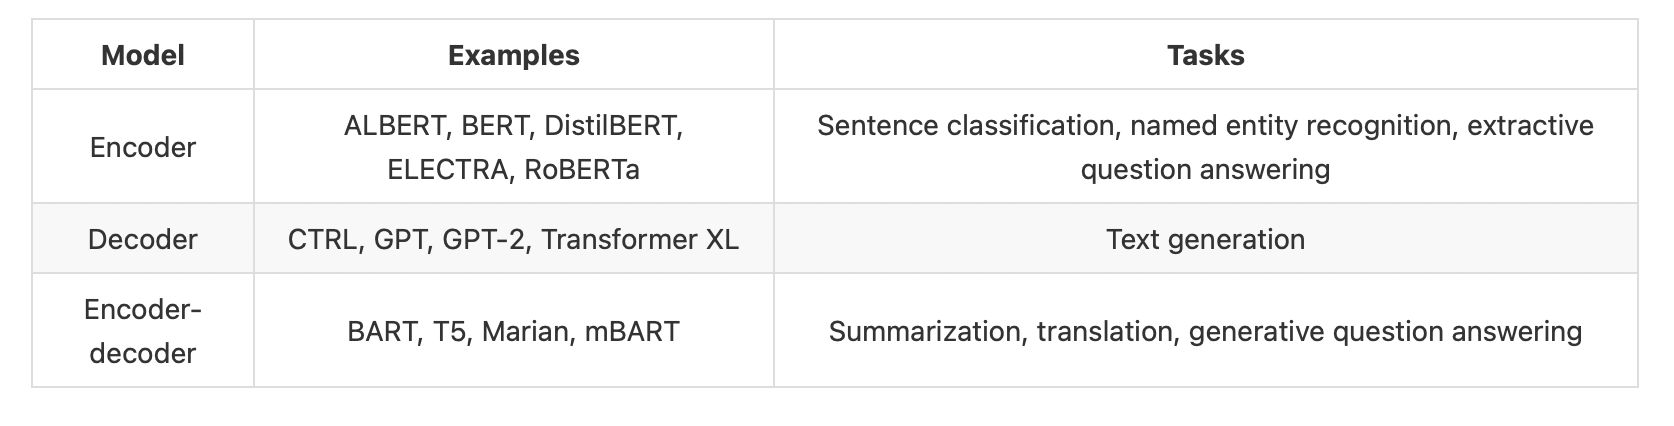

### models API

AutoModel 对 transformers 里面的绝大部分模型都进行了包装，他可以自动的识别你传入的模型 checkpont 是用的哪个class，从而方便使用者测试不同预训练语言模型的效果。但是一旦你需要对特定的模型结构进行修改，这时候你就需要使用特定的模型class了。这边拿 BERT 模型进行举例。

1. initialize transformer model randomly

In [ ]:
'''首先如果我们需要初始化一个模型，我们则需要 加载一个 config 对象，注意使用这样的方式的话，
是随机初始化的，主要用于模型的预训练'''
from transformers import BertConfig, BertModel

# Building the config
config = BertConfig()

# config = BertConfig.from_pretrained("bert-base-cased")

# Building the model from the config
model = BertModel(config)
'''
其中config 包含了不同的配置信息。

BertConfig {
  [...]
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  [...]
}
'''

2. load transformer model with checkpoints


In [ ]:
'''如果需要加载预训练好的模型， 则需要使用 from_pretrained 方法'''
from transformers import BertModel
model = BertModel.from_pretrained("bert-base-cased")

'''注意使用这种方式的话，我们没有必要显式地传入 BertConfig， 这是因为我们的模型文件中, 
已经定义了config.json，模型在在加载的时候，会默认加载这个文件，就等价于'''
from transformers import BertModel, BertConfig 
config = BertConfig.from_pretrained("bert-base-cased")
model = BertModel.from_pretrained("bert-base-cased", config=config, cache_dir='~/.cache/huggingface/transformers', mirror='tuna')

我们可以指定我们的模型的存储的地址，通过 cache_dir 这个参数，默认是：defaults to ~/.cache/huggingface/transformers.。如果想要改变全局的cache 目录，可以设置 HF_HOME 这个环境变量

3. save model

In [ ]:
model.save_pretrained("directory_on_my_computer")

这时候会保存以下两个文件：

    config.json: 为config 配置
    pytorch_model.bin： 模型的checkpoits
注意，我们在加载模型的时候，这些名字一般默认不能修改。

4. inference


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model_inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")

output = model(**model_inputs)

### tokenizers API

tokenizer 的加载和保存和 models 的方式一致，都是使用方法：from_pretrained, save_pretrained. 这个方法会加载和保存tokenizer使用的模型结构（例如sentence piece就有自己的模型结构），以及字典。

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased", use_fast=True) # 可以使用use fast加速

In [ ]:
'''和 AutoModel 类似，也有 AutoTokenizer这种class，它可以根据传入的 checkpoint，找到适当的 tokenizer class，并且加载 checkpoint'''
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
'''在加载完模型之后，我们可以直接使用tokenzer对文本进行tokenizer pipeline'''
tokenizer("Using a Transformer network is simple")
'''{'input_ids': [101, 7993, 170, 11303, 1200, 2443, 1110, 3014, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}'''
# 并且可以保存
tokenizer.save_pretrained("directory_on_my_computer")

In [ ]:
# Tokenize
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
'''
['Using', 'a', 'transform', '##er', 'network', 'is', 'simple']
[7993, 170, 11303, 1200, 2443, 1110, 3014]
'''

decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

checkpoint = "bert-base-chinese"
tokenizer = BertTokenizer.from_pretrained(checkpoint)
model = BertModel.from_pretrained(checkpoint)

sequence = "人生短短几个球不醉不罢休"

tokens = tokenizer.tokenize(sequence)  # 变成batch size = 1 
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)

output = model(input_ids)
output

我们了解了 tokenize，conver to ids， padding， attention mask，以及truncate 后，我们发现，对于文本的输入，我们需要进行一些列的 pipeline 才能得到模型的输入。这时候我们是否可以有封装的方法可以直接使用，而不用一次又一次地调用完整的步骤？

其实可以的，我们可以直接使用 tokenizer(text(s)) 就可以直接获得所有的模型的输入。而且它支持输入单句子或者句子list

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

In [ ]:
# 或者直接输入句子串：
sequences = [
  "I've been waiting for a HuggingFace course my whole life.",
  "So have I!"
]

model_inputs = tokenizer(sequences)

In [ ]:
'''Wrapping up: From tokenizer to model'''
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
  "I've been waiting for a HuggingFace course my whole life.",
  "So have I!"
]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)

### fine-tuning a 文本匹配 example

#### one small example

In [ ]:
'''麻雀虽小五脏俱全的example'''
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# This is new
batch["labels"] = torch.tensor([1, 1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()

#### load dataset using transformers datasets

MRPC (Microsoft Research Paraphrase Corpus) dataset数据集，这份数据集包含了5801个句子对，它的 - label = 1: 代表句子是同义词 - label = 0: 代表句子不是同义词

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc", cache_dir = '~/.cache/huggingface/dataset')
'''
DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})
'''

其中 load_dataset 方法, 可以从不同的地方构建数据集

    from the HuggingFace Hub,
    from local files, e.g. CSV/JSON/text/pandas files, or
    from in-memory data like python dict or a pandas dataframe.
例如： datasets = load_dataset("text", data_files={"train": path_to_train.txt, "validation": path_to_validation.txt} 具体可以参考文档https://huggingface.co/docs/datasets/loading_datasets.html#from-local-files

我们可以看到数据包含了训练集，测试集和验证集。每个example 包含了（'sentence1', 'sentence2', 'label', 'idx'） 数据集下载完了后被缓存到 cache_dir 目录下：默认为 ~/.cache/huggingface/dataset， 我们可以修改这个参数，或者是环境变量HF_HOME

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]
'''
{'idx': 0,
 'label': 1,
 'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .'}
'''

raw_train_dataset.features # 还可以查看数据集的特征
'''
{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['not_equivalent', 'equivalent'], names_file=None, id=None),
 'idx': Value(dtype='int32', id=None)}
'''

#### preprocess

In [ ]:
# 单条输入
inputs = tokenizer("This is the first sentence.", "This is the second one.")

'''{ 
  'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102],
  'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}'''

In [ ]:
# 对整个数据集处理
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
    return_tensors="pt"
)

这样子使用是OK的，但是这样子处理之后，tokenized_dataset不再是一个dataset格式。而且是一旦我们的dataset 过大，无法放在 RAM 中，那么这样子的做法会导致 Out of Memory 的异常。

然而 Datasets库使用的是 Apache Arrow 文件格式，所以你只需要加载你需要的样本到内存中就行了，不需要全量加载。

为了使我们的数据保持dataset的格式，我们需要使用 Dataset.map 方法。这能够使我们有更大的灵活度，我们直接给 map 函数传入一个函数，这个函数传入 dataset 的一个样本，然后返回映射后的结果：

In [ ]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], 
    truncation=True,
    return_tensors="pt")

这个函数传入一个字典型的 example，然后传出一个新的字典，包含了key：input_ids, attention_mask, and token_type_ids.

注意：我们这边没有使用padding，这是因为把所有的样本padding到最大的长度效率很低，通常我们会在构造batch的时候才进行padding，因为我们只需要padding到这个batch中的最大长度，而不是训练的最大长度。这个可以节省非常多的预处理时间。

我们可以设置参数 batched=True，这样子我们的函数可以一下子处理多条数据，而不是每次一条一条地处理。

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

数据映射完了之后，我们会发现，我们会新增一些字典的key，即input_ids, attention_mask, and token_type_ids.

In [ ]:
DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2', 'token_type_ids'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2', 'token_type_ids'],
        num_rows: 408
    })
    test: Dataset({
        features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2', 'token_type_ids'],
        num_rows: 1725
    })
})

我们可以在 Dataset.map 中使用 num_proc 参数. 我们这边没有使用是因为我们的tokenizer 使用了 use_fast=True 参数，所以采用的是多线程的方式处理样本。如果没有使用 fast tokenizer，则可以使用num_proc 参数提高速度。

最后我们需要对于一个batch 的输入进行padding，这边使用的 dynamic padding 的方式。每个batch 都padding 到这个batch 最长的长度。

Dynamic padding

在Pytorch 中，把一个 batch 的数据进行聚合的方式是 collate 函数。它是 DataLoader 类的一个参数。默认的时候，collate函数就会将获取的数据样本转化为Pytorch Tensor 然后将它们进行拼接（适用于lists，tuples，dictionary）。所以这就要求我们的 batch 中的example 必须是相同的 size，所以我们这时候需要在 collate 的时候进行 dynamic padding。

注意：如果使用TPU，则还是需要padding 到模型的 max length，因为TPU这样子效率更高。

为了实现 dynamic padding，我们需要定义一个 collate 函数，对于不同的batch 数据，进行不同长度的padding。

transformers提供了一个函数 DataCollatorWithPadding， 它传入参数：tokenizer，可以知道 tokenizer 的padding token，以及token的策略（左padding 或者右padding）

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
'''为了测试，我们移除了样本中的 idx, sentence1, and sentence2 列。我们首先看一个batch 中的每个input ids 的长度。'''
samples = tokenized_datasets["train"][:8]
samples = {
    k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]
}
[len(x) for x in samples["input_ids"]]

>>>
[50, 59, 47, 67, 59, 50, 62, 32]
````

我们可以看到我们的batch 中的长度从 32 到 62 不等，对此我们需要把每个长度都padding 到 62, 
使用的是 `data_collator`:

batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}
>>>
{'attention_mask': torch.Size([8, 67]),
 'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'labels': torch.Size([8])}

#### Trainer API

Transformers 提供了 Trainer class帮助进行模型的fine-tuning。一旦已完成了数据预处理，则只需要简单的几步，就可以使用 Trainer 进行模型的训练了。

首先确保我们完成了数据预处理：

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
'''步骤 1：我们首先需要配置训练的参数，用于模型的训练和验证。我们其实只需要指定模型的保存路径即可，
其他的都是使用TrainingArguments默认配置'''
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

In [ ]:
'''步骤 2：选择相对应的预训练语言模型，这边我们使用一个2分类的文本模型'''
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
'''这时候会报一个warning，因为bert 模型并没有存储classifier head。所以需要进行模型的精调'''

In [ ]:
'''步骤 3：在模型定义好之后，我们可以直接使用 Trainer 进行模型的精调了'''
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)
trainer.train()

于是模型就开始训练了，默认是500 steps进行一次的report。但是这边不会告诉你模型的效果，因为：

我们没有配置trianer，验证的策略：evaluation_strategy 是 "steps"（每个step验证一次） 或者是 "epoch"（每轮验证一次）
我们没有配置 compute_metrics 函数，告诉模型如何评价指标。所以模型只会输出loss

Evaluation

我们现在看如何构造 compute_metrics 函数，这个函数

    传入 EvalPrediction（一个 namedtuple，包含了 predictions 和 label_ids 两个keys）。
    输出：一个字典，key：metric 名字，value：metric 值。
我们首先先看一下如何获取预测的结果：

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])

这个预测的结果是也是一个 namedtuple，包含了三个属性：

    predictions： 预测值，形状为:[batch_size, num_labels], 是logits 而不是经过softmax之后的结果
    label_ids：真实的的label id
    metrics：评价指标，默认是loss，但是一旦我们传入了 compute_metrics 函数给 Trainer，那么该函数的返回值也会一并输出
对于我们的模型预测index，我们可以通过：

In [ ]:
import numpy as np
preds = np.argmax(predictions.predictions, axis=-1)

为了构造 compute_metric，我们可以使用 Datasets 库的 load_metric 函数，然后我们可以使用它的 compute 方法进行指标计算：

In [ ]:
from datasets import load_metric

metric = load_metric("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

>>>
{'accuracy': 0.8578431372549019, 'f1': 0.8996539792387542}

In [ ]:
'''我们将所有包装成一个函数，得到我们的 compute_metrics'''
def compute_metrics(eval_preds):
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
'''现在我们配置我们的验证策略为每个epoch进行验证，以及传入验证的指标'''
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
'''Trainer 默认支持 多GPU/TPU，也支持混合精度训练，可以在训练的配置 TrainingArguments 中，设置 fp16 = True'''

#### ⭐pytorch&transformers 结合自定义训练

In [ ]:
# 数据处理
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

我们使用 Trainer 的时候不需要指定 DataLoader等，但是在自定义模型训练阶段，我们需要, 并且还需要再做如下的预处理： 

    - 删除模型不需要的输入字段 
    - 将字段label 改为 labels， 因为模型的传入参数是labels 
    - 将list 转为 pytorch tensor 格式

In [ ]:
# 数据加载
tokenized_datasets = tokenized_datasets.remove_columns(
    ["sentence1", "sentence2", "idx"]
)
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
print(tokenized_datasets["train"].column_names)
>>>
['attention_mask', 'input_ids', 'labels', 'token_type_ids']

# 定义我们的 dataloaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=8, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=8, collate_fn=data_collator
)

# 查看到数据
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}
>>>
{'attention_mask': torch.Size([8, 65]),
 'input_ids': torch.Size([8, 65]),
 'labels': torch.Size([8]),
 'token_type_ids': torch.Size([8, 65])}

In [ ]:
# 模型使用
'''接着我们加载预训练模型'''
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

'''然后将数据喂给模型'''
outputs = model(**batch)
print(outputs.loss, outputs.logits.shape)
>>>
tensor(0.5441, grad_fn=<NllLossBackward>) torch.Size([8, 2])

'''当labels 存在时，所有的 transformers 模型都会输出loss，以及模型的logits'''

In [ ]:
# 设置模型的优化器
'''Trainer 的默认优化器时 AdamW， 这个优化器和 Adam 一样, 但是多了一些 weight decay regularization处理'''
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

'''默认的学习率是线性的学习率，从5e-5 到 0。我们需要知道总的训练的steps次数（#epoch * batch size），batch size 就是 len(train_dataloader)。 
其中 Trainer 默认训练 3个epoch，所以我们也保持不变'''
from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)
print(num_training_steps)
>>>
1377

In [ ]:
# 训练loop
'''我们需要设置模型在GPU/CPU上跑'''
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device
>>>
device(type='cuda')

'''现在我们可以进行训练了，为了展示进度，我们可以使用 tqdm 库'''
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss # 只要传入labels，就会计算loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

In [ ]:
# 验证 loop
'''在之前我们没有对模型的结果进行验证，我们可以继续使用 metric.compute对模型进行验证，
对于batch 的数据，我们可以使用 add_batch 对数据进行聚合，知道数据完成完整之后，才 使用 metric.compute() 进行指标计算'''
from datasets import load_metric

metric= load_metric("glue", "mrpc")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

>>>
{'accuracy': 0.8431372549019608, 'f1': 0.8907849829351535}

In [ ]:
# 完整的单GPU/CPU 训练脚本
from transformers import AdamW, AutoModelForSequenceClassification, get_scheduler

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
optimizer = AdamW(model.parameters(), lr=3e-5)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

In [ ]:
# 多GPU 训练
'''如果我们需要使用多GPU/TPU训练，则我们可以使用 transformers 的 Accelerate 库。我们只需要修改几行代码，就可以完成分布式训练
首先我们需要初始化 Accelerator'''
from accelerate import Accelerator

accelerator = Accelerator() # accelerator 会自动判断分布式环境，并且合理的初始化

'''然后我们去除device 的分配，采用 accelerator 对数据，模型，优化器进行封装. 
accelerator.prepare 会保证模型在分布式环境中可以正常训练'''
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model.to(device)
# accelerator 会自动进行设备的分配

train_dataloader, eval_dataloader, model, optimizer = accelerator.prepare(
     train_dataloader, eval_dataloader, model, optimizer
)

'''同理我们去除 batch 数据的设备分配，并且使用accelerator对loss的反向传播进行封装。 
采用 accelerator.backward(loss)替代 loss.backward()'''
# batch = {k: v.to(device) for k, v in batch.items()}
outputs = model(**batch)
...
# loss.backward()
accelerator.backward(loss)

In [ ]:
# 最终得到下述的脚本，存为 train.py
from accelerate import Accelerator
from transformers import AdamW, AutoModelForSequenceClassification, get_scheduler

accelerator = Accelerator()

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
optimizer = AdamW(model.parameters(), lr=3e-5)

train_dl, eval_dl, model, optimizer = accelerator.prepare(
    train_dataloader, eval_dataloader, model, optimizer
)

num_epochs = 3
num_training_steps = num_epochs * len(train_dl)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dl:
        outputs = model(**batch)
        loss = outputs.loss
        accelerator.backward(loss)

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

In [ ]:
'''在脚本中，为了进行分布式训练，我们需要运行下面的命令'''
accelerate config

'''然后回答一下问题，接着它会自动保存你的配置到文件中：
然后再执行'''
accelerate launch train.py

'''就可以进行训练了'''

In [ ]:
'''如果需要在notebook 中使用accelerate 则需要执行下面语句'''
from accelerate import notebook_launcher

notebook_launcher(training_function)